<a href="https://colab.research.google.com/github/BernardMusewu/maize_yield/blob/main/Maize_yield_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


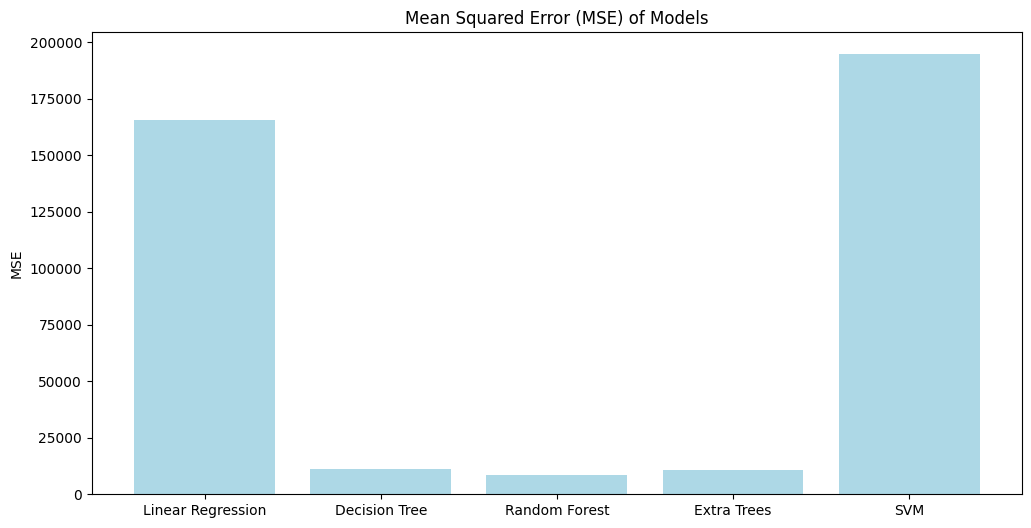

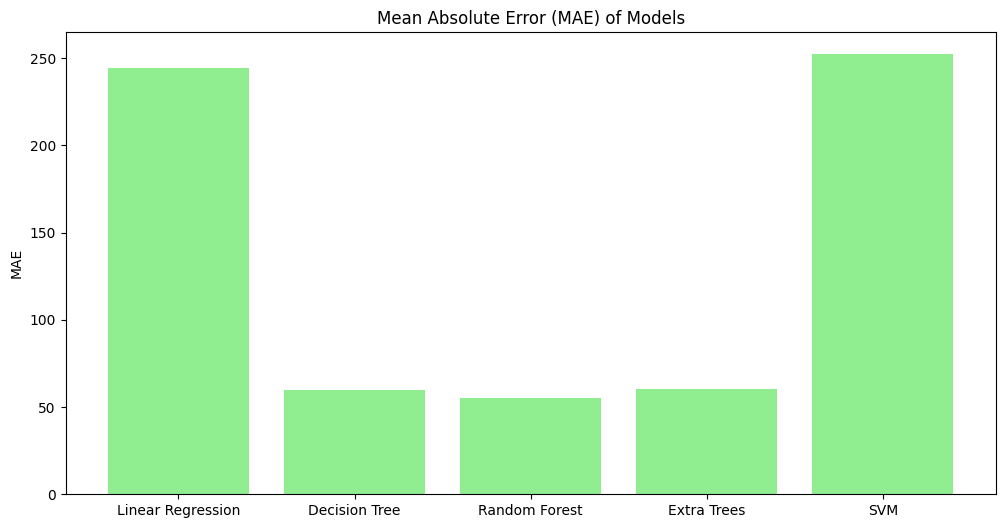

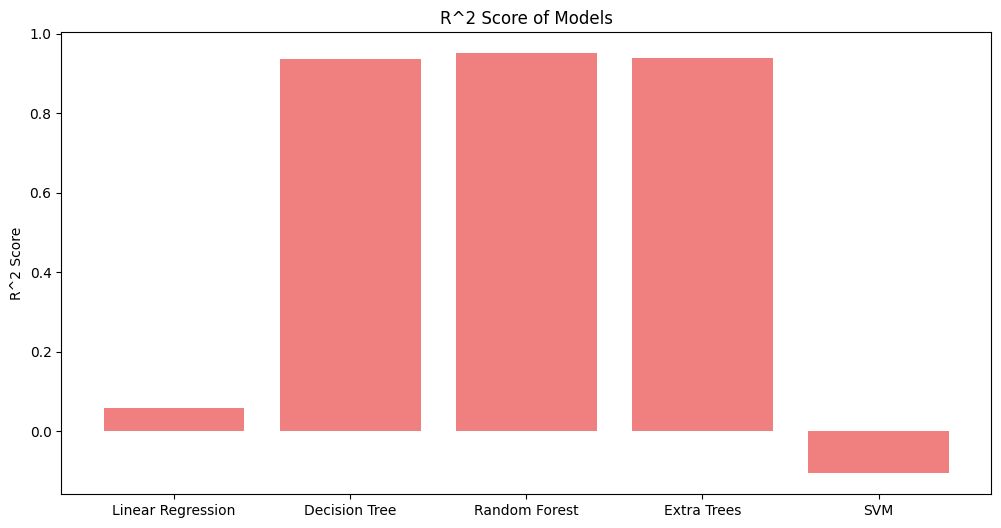

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and their respective metrics
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Extra Trees', 'SVM']
mse = [165679.83133058393, 11234.051762962963, 8687.367168859257, 10677.315398257044, 194556.97685889874]
mae = [244.3442282959746, 59.55925925925925, 55.23295555555552, 60.307549382716026, 252.242617585135]
r2_score = [0.05896990925772028, 0.936192711780284, 0.9506573983714937, 0.939354868981865, -0.10504681298692531]

# Plotting Mean Squared Error
plt.figure(figsize=(12, 6))
plt.bar(models, mse, color='lightblue')
plt.title('Mean Squared Error (MSE) of Models')
plt.ylabel('MSE')
plt.show()

# Plotting Mean Absolute Error
plt.figure(figsize=(12, 6))
plt.bar(models, mae, color='lightgreen')
plt.title('Mean Absolute Error (MAE) of Models')
plt.ylabel('MAE')
plt.show()

# Plotting R^2 Score
plt.figure(figsize=(12, 6))
plt.bar(models, r2_score, color='lightcoral')
plt.title('R^2 Score of Models')
plt.ylabel('R^2 Score')
plt.show()


In [ ]:

import pandas as pd

excel_file_path = '/content/drive/My Drive/maize_yield_finale.xlsx'

df = pd.read_excel(excel_file_path)

print(df.head())


   district   crop    Year  Kg/ha_yield  average_rain_fall_mm_per_year  \
0       NaN    NaN     NaN      9045.00                            878   
1       NaN    NaN     NaN       384.62                            340   
2  Mangochi  Maize  1992.0       456.56                            455   
3    Nsanje  Maize  1993.0       250.00                            767   
4  Chikwawa  Maize  1994.0        90.24                            987   

   pesticides_tonnes  avg_temp  Unnamed: 7  Unnamed: 8 Unnamed: 9  
0                NaN       NaN         NaN         NaN        NaN  
1            49.2360     16.26         NaN         NaN        NaN  
2            24.3094     16.27         NaN         NaN        NaN  
3            20.4378     17.00         NaN         NaN        NaN  
4            25.1004     17.88         NaN         NaN        D*4  


In [ ]:
df.isnull().sum()

,0
district,2
crop,2
Year,2
Kg/ha_yield,0
average_rain_fall_mm_per_year,0
pesticides_tonnes,1
avg_temp,1
Unnamed: 7,806
Unnamed: 8,806
Unnamed: 9,805


In [ ]:

# Delete rows with index 1 and 2 (remember, Python uses 0-based indexing)
df = df.drop([1, 2])

print(df.head())

df.isnull().sum()

   district   crop    Year  Kg/ha_yield  average_rain_fall_mm_per_year  \
0       NaN    NaN     NaN      9045.00                            878   
3    Nsanje  Maize  1993.0       250.00                            767   
4  Chikwawa  Maize  1994.0        90.24                            987   
5   Ntchisi  Maize  1995.0       322.30                            766   
6  Blantyre  Maize  1996.0       343.08                            778   

   pesticides_tonnes  avg_temp  Unnamed: 7  Unnamed: 8 Unnamed: 9  
0                NaN       NaN         NaN         NaN        NaN  
3            20.4378     17.00         NaN         NaN        NaN  
4            25.1004     17.88         NaN         NaN        D*4  
5            53.9418     17.36         NaN         NaN        NaN  
6             9.5954     16.76         NaN         NaN        NaN  


,0
district,1
crop,1
Year,1
Kg/ha_yield,0
average_rain_fall_mm_per_year,0
pesticides_tonnes,1
avg_temp,1
Unnamed: 7,804
Unnamed: 8,804
Unnamed: 9,803


In [ ]:
# prompt: remove the three unnamed columns at the end of df

df = df.iloc[:, :-3]

In [ ]:
df.head()

,district,crop,Year,Kg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,NaN,NaN,NaN,9045.00,878,NaN,NaN
3,Nsanje,Maize,1993.0,250.00,767,20.4378,17.00
4,Chikwawa,Maize,1994.0,90.24,987,25.1004,17.88
5,Ntchisi,Maize,1995.0,322.30,766,53.9418,17.36
6,Blantyre,Maize,1996.0,343.08,778,9.5954,16.76


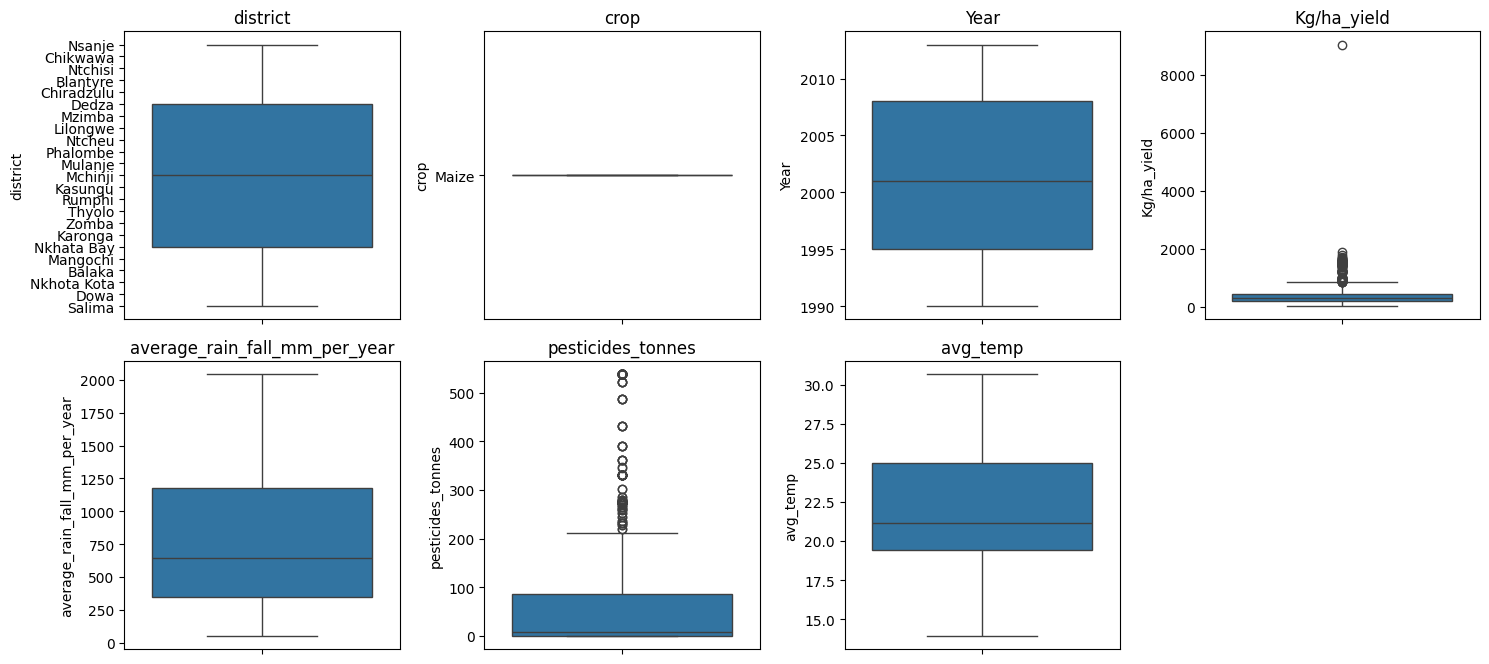

(588, 7)


In [ ]:
# prompt: visualize outliers in each column and drop them

import matplotlib.pyplot as plt
import seaborn as sns

# Box plots to visualize outliers for each column
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns):
    plt.subplot(3, 4, i + 1)  # Adjust subplot layout as needed
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Identify and remove outliers using IQR method, only for numeric columns
def remove_outliers_iqr(df, column):
    if pd.api.types.is_numeric_dtype(df[column]):  # Check if column is numeric
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        return df_filtered
    else:
        return df  # Return the DataFrame unchanged if column is not numeric


# Apply outlier removal to each column
for column in df.columns:
    df = remove_outliers_iqr(df, column)

print(df.shape) # Check the shape after removing outliers

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

# Create a dropdown for selecting the district, but filter out NaN values first
district_dropdown = widgets.Dropdown(
    options=df['district'].dropna().unique(),  # Drop NaN values before getting unique districts
    description='District:'
)

# Function to plot data for maize (remains unchanged)
def plot_data(district):
    plt.figure(figsize=(10,6))
    temp_df = df[(df['district'] == district) & (df['crop'] == 'Maize')]
    plt.plot(temp_df['Year'], temp_df['Kg/ha_yield'], marker='o')
    plt.title(f'Maize yield (hg/ha) over the years in {district}')
    plt.xlabel('Year')
    plt.ylabel('Kg/ha yield')
    plt.grid(True)
    plt.show()

# Use interactive function to automatically update the plot (remains unchanged)
widgets.interactive(plot_data, district=district_dropdown)

interactive(children=(Dropdown(description='District:', options=('Nsanje', 'Chikwawa', 'Ntchisi', 'Blantyre', …

In [ ]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Create a dropdown for selecting the district, but filter out NaN values first
district_dropdown = widgets.Dropdown(
    options=df['district'].dropna().unique().tolist(),  # Drop NaN values before getting unique districts and convert to list
    description='District:'
)

# Function to plot data for fertilizer usage
def plot_data(district):
    plt.figure(figsize=(10,6))
    temp_df = df[df['district'] == district]
    plt.plot(temp_df['Year'], temp_df['pesticides_tonnes'], marker='o')
    plt.title(f'Pesticides (Tonnes) over the years in {district}')
    plt.xlabel('Year')
    plt.ylabel('pesticides_tonnes')
    plt.grid(True)
    plt.show()

# Use interactive function to automatically update the plot
widgets.interactive(plot_data, district=district_dropdown)

interactive(children=(Dropdown(description='District:', options=('Nsanje', 'Chikwawa', 'Ntchisi', 'Blantyre', …

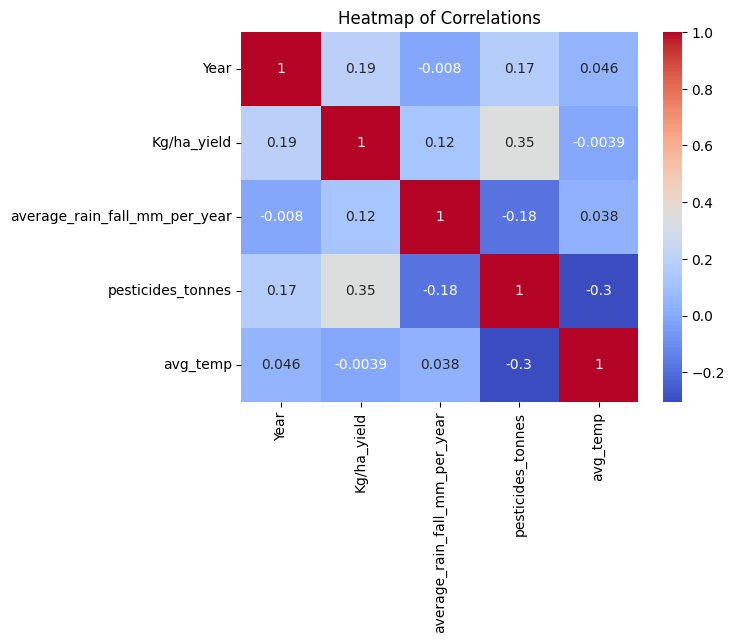

In [ ]:
# Correlation of numeric features
corr = df.corr(numeric_only = True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlations')
plt.show()

In [ ]:
df.rename(columns={'pesticides_tonnes': 'fertilizer'}, inplace=True)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import SVR

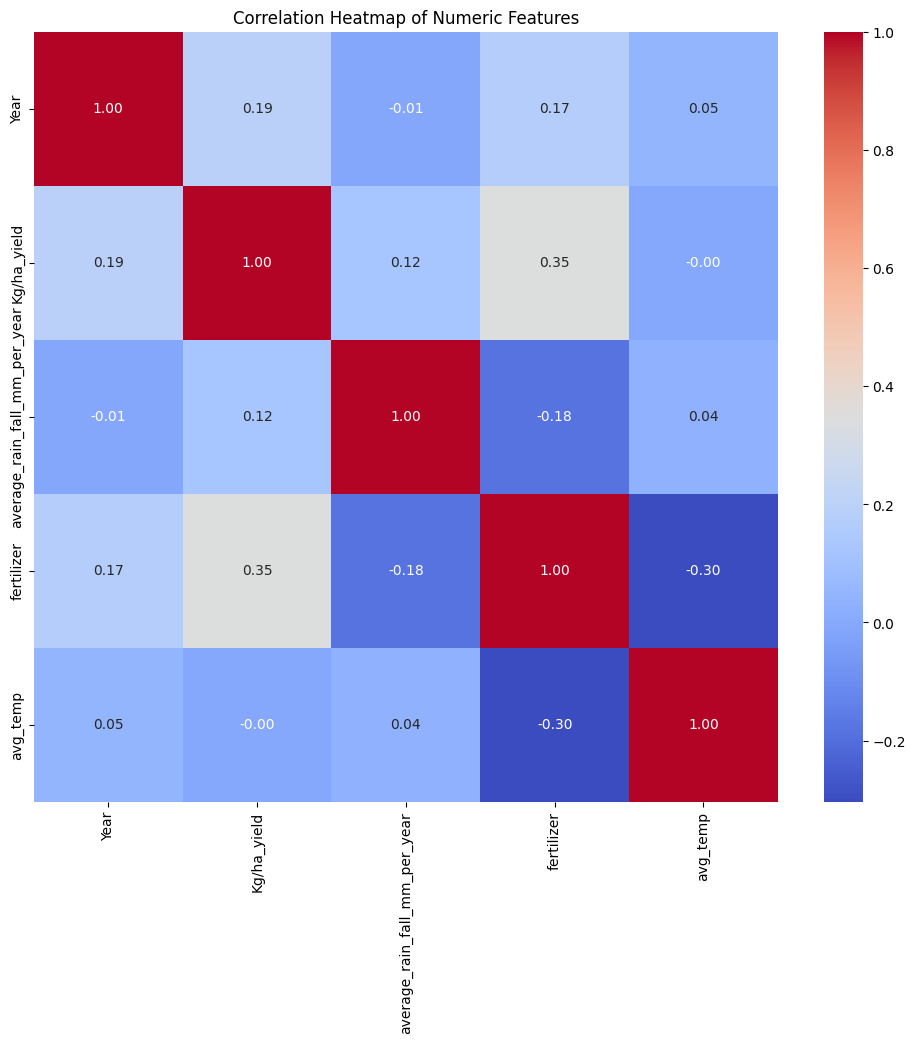

In [ ]:
# prompt: plot correlation hitmap

# Correlation of numeric features
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [ ]:
X = df.drop('Kg/ha_yield', axis=1)
y = df['Kg/ha_yield']

In [ ]:
categorical_features = ['district']
numerical_features = ['Year', 'average_rain_fall_mm_per_year', 'fertilizer', 'avg_temp']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor(random_state=101)),
    ('Random Forest', RandomForestRegressor(random_state=101)),
    ('Extra Trees', ExtraTreesRegressor(random_state=101)),
    ('Support Vector Machine', SVR())
]

In [ ]:
for name, model in models:
    # Create a pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'{name}:')
    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R^2 Score: {r2}\n')

Linear Regression:
Mean Squared Error: 16805.114093313703
Mean Absolute Error: 98.32803216621245
R^2 Score: 0.10744113980423264

Decision Tree:
Mean Squared Error: 6976.27692542373
Mean Absolute Error: 60.87305084745764
R^2 Score: 0.629473638417981

Random Forest:
Mean Squared Error: 5421.528354783388
Mean Absolute Error: 55.669120338983035
R^2 Score: 0.7120499663379367

Extra Trees:
Mean Squared Error: 5843.076842563051
Mean Absolute Error: 58.785394915254244
R^2 Score: 0.6896605415663686

Support Vector Machine:
Mean Squared Error: 18109.31152397608
Mean Absolute Error: 105.7474501604994
R^2 Score: 0.038172168125818806



In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline

# Define the ExtraTreesRegressor model
model = ExtraTreesRegressor(random_state=0)

# Create a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

# Define the hyperparameters to tune
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

# Evaluate the model with the best parameters
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}\n')


Best parameters: {'model__max_depth': 20, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 50}
Mean Squared Error: 6032.409769562287
Mean Absolute Error: 60.13609193114188
R^2 Score: 0.6796046275998456



In [ ]:
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from google.colab import drive

import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from google.colab import drive

# Initialize the model
rf_model = RandomForestRegressor(random_state=101)

# Create a pipeline with preprocessor and model
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', rf_model)])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Verify the pipeline structure (ensure both preprocessor and model exist)
print(pipeline)

# Define the path to save the pipeline in Google Drive
filename = '/content/drive/MyDrive/maize_model/random_forest_model_2.pkl'

# Save the entire pipeline (preprocessor + model) to a pickle file in Google Drive
with open(filename, 'wb') as file:
    pickle.dump(pipeline, file)

print(f"Pipeline (including preprocessor and model) saved to {filename}")


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Year',
                                                   'average_rain_fall_mm_per_year',
                                                   'fertilizer', 'avg_temp']),
                                                 ('cat', OneHotEncoder(),
                                                  ['district'])])),
                ('model', RandomForestRegressor(random_state=101))])
Pipeline (including preprocessor and model) saved to /content/drive/MyDrive/maize_model/random_forest_model_2.pkl


In [ ]:

# Extract the preprocessor and model from the pipeline
preprocessor = pipeline.named_steps['preprocessor']
model = pipeline.named_steps['model']

try:
    feature_names = preprocessor.get_feature_names_out()
except AttributeError:
    # If the preprocessor doesn't have `get_feature_names_out`,
    # you'll need to get the names manually from each transformer
    feature_names = preprocessor.transformers_[0][1].get_feature_names_out()

# Print the actual feature names
print("Transformed feature names:")
print(feature_names)

# If the model has feature importance (e.g., RandomForest)
if hasattr(model, 'feature_importances_'):
    feature_importance = model.feature_importances_
    for name, importance in zip(feature_names, feature_importance):
        print(f"{name}: {importance}")

# Otherwise, just print the feature names
else:
    print("Model does not have feature importances. Only feature names:")
    print(feature_names)
